# Task-3

Problem Description:
    
1. read image from folder 

2. load in the numpy array or in excel (display some images)

3. extract feature from step using builtin fun  (top 5 image feature and its label) 

4. split train and test

5. learning algorihm

6. test (display test image with accuracy)

7. accuracy score, Precision, recall , F1-score 

Importing necessary libraries

In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we have our dataset of cat and dog images.

We have used simple perceptron model for image classification. 

Below is the code to read dataset from a folder located in our local system.

In [2]:
X,y=[],[]
for i in os.listdir('Finaldataset'):  
        try:
            image = cv2.imread("Finaldataset/"+i) 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image/255,(100,100))  
            X.append(image)                          
            y.append(i)                              
        except Exception as e:
            pass

In [3]:
 X[0].shape

(100, 100)

In [4]:
y[-1]

'9.jpg'

We have taken test data size as 20%

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=100)

<Figure size 432x288 with 0 Axes>

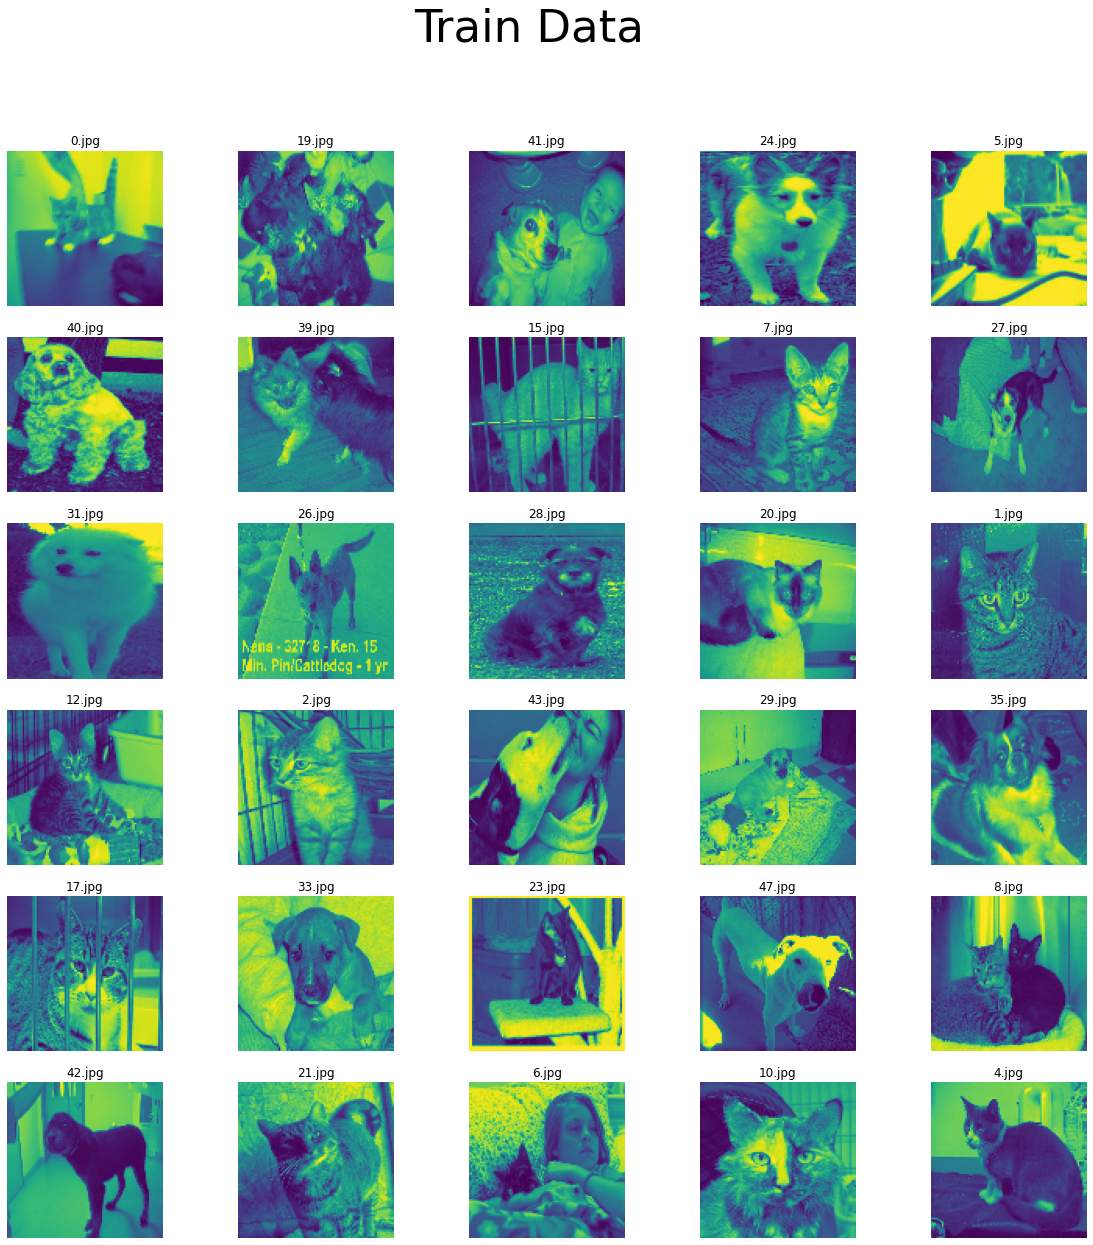

In [6]:
fig = plt.figure()
_, axs = plt.subplots(6,5, figsize=(20,20)) 
axs = axs.flatten()
for img, ax,k in zip(xtrain, axs,ytrain):    
    ax.axis("off")                     
    ax.set_title(k)               
    ax.imshow(img)
plt.suptitle('Train Data',fontsize=45)                
plt.savefig("Training Image.jpg")                  
plt.show()                                           

In [7]:
xtrain = np.array(xtrain).astype(np.float32)
xtest = np.array(xtest).astype(np.float32)

In [8]:
xtrain[-1].shape

(100, 100)

(100, 100)


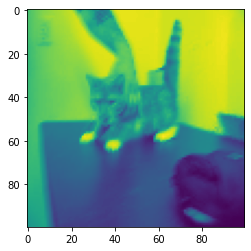

In [9]:
plt.imshow(xtrain[0])
print(xtrain[0].shape)

In [10]:
from sklearn.preprocessing import LabelEncoder         
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)

In [16]:
ytest

array([1, 4, 6, 3, 8, 9, 0, 7, 2, 5], dtype=int64)

In [11]:
xtrain_reshaped = xtrain.reshape((len(xtrain),-1)) 
xtest_reshaped = xtest.reshape((len(xtest),-1))

In [12]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(xtrain_reshaped,ytrain)
predict = model.predict(xtest_reshaped)

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy of the model : ",accuracy_score(predict,ytest)*100)

Accuracy of the model :  10.0


NOTE : Here we are gettting the accuracy of 10% only , because our image dataset is very small.

Dataset size for this problem is only around 40 to 50 images and out of that also only 80% of total dataset size is used for training the model.

In [14]:
print(classification_report(predict,ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         4
          29       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         2

    accuracy                           0.10        10
   macro avg       0.08      0.08      0.08        10
weighted avg       0.10      0.10      0.10        10

